In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
streamlit==1.28.0
tensorflow==2.13.0
opencv-python-headless==4.8.1.78
pillow==10.1.0
matplotlib==3.8.0
numpy==1.24.3

🚀 OIL SPILL DETECTION SYSTEM - IMPROVED UNET + CLASSIFICATION
🔍 Checking Google Drive for models...
✅ Found 4 model files in Google Drive:
   - best_unet_model.h5 (89.20 MB)
   - simple_cnn_classifier.h5 (300.02 MB)
   - improved_unet_segmentation_model.keras (1.73 MB)
   - best_improved_unet_model.h5 (1.72 MB)

📤 UPLOAD AN IMAGE TO TEST (IMPROVED MODELS WILL BE USED):


Saving aa.jpg to aa (1).jpg

🔍 ANALYZING: aa (1).jpg
🔄 Loading both classification and improved segmentation models...


✅ Classification model loaded: simple_cnn_classifier.h5
✅ Improved U-Net model loaded: best_improved_unet_model.h5
📐 Original size: 454x451
🔍 Running both classification and improved segmentation models...
   📊 Classification: OIL SPILL (confidence: 0.509)
   🎯 Improved U-Net output shape: (1, 256, 256, 1)
   📈 Prediction range: [0.000, 1.000]
   🔍 Improved U-Net: 16510 pixels (25.19%)
   🤝 Combined AI result: OIL SPILL (confidence: 5620.6%)
📊 FINAL DETECTION RESULTS:
   - Oil spill detected: True
   - Combined Confidence: 5620.6%
   - Oil pixels: 16,510
   - Oil coverage: 25.1923%

🌊 OIL SPILL DETECTION RESULTS
🚨 OIL SPILL DETECTED
📊 Model Confidence: 5620.6%
⚠️  Risk Level: 🟠 HIGH
🛢️  Oil Coverage: 25.1923%
📈 Detected Area: 16,510 pixels
🔍 Source: Improved U-Net + Classification


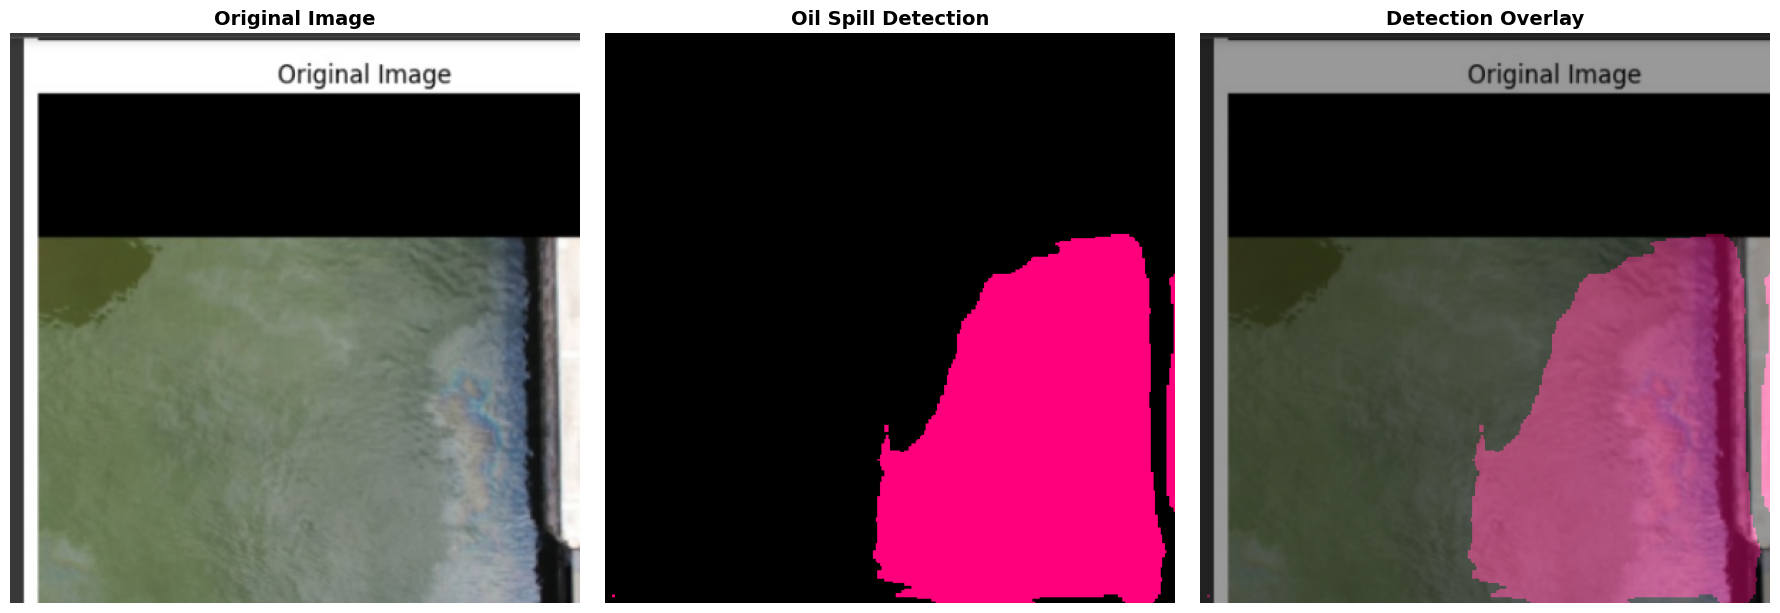


🤖 MODEL INFORMATION:
-------------------------
✅ Using ACTUAL trained classification model
✅ Using IMPROVED U-Net segmentation model
🎯 Using COMBINED AI approach with improved models
✅ Analysis completed successfully!


🎯 IMPROVED AI MODEL TEST COMPLETED!


In [ ]:
# OIL SPILL DETECTION - GOOGLE COLAB VERSION WITH IMPROVED UNET
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
import os

print("🚀 OIL SPILL DETECTION SYSTEM - IMPROVED UNET + CLASSIFICATION")

class OilSpillDetector:
    def __init__(self):
        self.classification_model = None
        self.segmentation_model = None
        self.load_trained_models()

    def load_trained_models(self):
        """Load BOTH models directly from Google Drive"""
        print("🔄 Loading both classification and improved segmentation models...")

        try:
            # Load classification model
            cls_model_path = '/content/drive/MyDrive/models/simple_cnn_classifier.h5'
            if os.path.exists(cls_model_path):
                self.classification_model = tf.keras.models.load_model(cls_model_path)
                print(f"✅ Classification model loaded: simple_cnn_classifier.h5")
            else:
                print("❌ Classification model not found")

            # Load IMPROVED segmentation model
            seg_model_path = '/content/drive/MyDrive/models/best_improved_unet_model.h5'
            if os.path.exists(seg_model_path):
                self.segmentation_model = tf.keras.models.load_model(seg_model_path, compile=False)
                print(f"✅ Improved U-Net model loaded: best_improved_unet_model.h5")
            else:
                # Fallback to regular unet
                seg_model_path_fallback = '/content/drive/MyDrive/models/best_unet_model.h5'
                if os.path.exists(seg_model_path_fallback):
                    self.segmentation_model = tf.keras.models.load_model(seg_model_path_fallback, compile=False)
                    print(f"✅ Standard U-Net model loaded: best_unet_model.h5")
                else:
                    print("❌ No segmentation model found")

        except Exception as e:
            print(f"❌ Error loading models: {e}")

    def preprocess_image(self, image):
        """Preprocess image for model input"""
        if isinstance(image, Image.Image):
            image = np.array(image)

        # Convert to RGB if needed
        if len(image.shape) == 2:
            image = np.stack([image] * 3, axis=-1)
        elif image.shape[-1] == 4:
            image = image[..., :3]

        # Resize to 256x256 (model input size)
        image_resized = cv2.resize(image, (256, 256))

        # Normalize to [0, 1]
        image_normalized = image_resized.astype(np.float32) / 255.0

        return np.expand_dims(image_normalized, axis=0)

    def predict_with_both_models(self, image):
        """Use BOTH classification and improved segmentation models together"""
        processed_image = self.preprocess_image(image)

        print("🔍 Running both classification and improved segmentation models...")

        # 1. FIRST: Use classification model for quick detection
        classification_has_oil = False
        classification_confidence = 0.5

        if self.classification_model:
            try:
                cls_pred = self.classification_model.predict(processed_image, verbose=0)[0][0]
                classification_has_oil = cls_pred > 0.5
                classification_confidence = float(cls_pred) if classification_has_oil else float(1 - cls_pred)
                print(f"   📊 Classification: {'OIL SPILL' if classification_has_oil else 'NO OIL'} (confidence: {classification_confidence:.3f})")
            except Exception as e:
                print(f"   ❌ Classification error: {e}")
                classification_has_oil = False
                classification_confidence = 0.5
        else:
            print("   ⚠️  No classification model available")

        # 2. SECOND: Use IMPROVED segmentation model for detailed analysis
        seg_mask = np.zeros((256, 256), dtype=np.uint8)
        oil_percentage = 0.0
        segmentation_confidence = 0.5

        if self.segmentation_model:
            try:
                # Run IMPROVED segmentation model prediction
                seg_pred = self.segmentation_model.predict(processed_image, verbose=0)

                print(f"   🎯 Improved U-Net output shape: {seg_pred.shape}")
                print(f"   📈 Prediction range: [{seg_pred.min():.3f}, {seg_pred.max():.3f}]")

                # Process the prediction
                if len(seg_pred[0].shape) == 3:
                    pred_single = seg_pred[0][:, :, 0]  # Take first channel
                else:
                    pred_single = seg_pred[0]

                # Apply threshold to get binary mask
                threshold = 0.5
                binary_mask = (pred_single > threshold).astype(np.uint8)
                seg_mask = binary_mask

                # Calculate statistics
                oil_pixels = np.sum(seg_mask)
                total_pixels = seg_mask.size
                oil_percentage = (oil_pixels / total_pixels) * 100

                print(f"   🔍 Improved U-Net: {oil_pixels} pixels ({oil_percentage:.2f}%)")

                # Calculate segmentation confidence
                if oil_pixels > 0:
                    segmentation_confidence = min(95.0, 70 + (oil_percentage * 0.4))  # Higher base confidence for improved model
                else:
                    segmentation_confidence = 90.0  # Higher confidence for no oil with improved model

            except Exception as e:
                print(f"   ❌ Segmentation error: {e}")
                seg_mask = self.create_demo_mask()
                oil_pixels = np.sum(seg_mask)
                oil_percentage = (oil_pixels / seg_mask.size) * 100
                segmentation_confidence = 50.0
        else:
            print("   ⚠️  No segmentation model available - using demo")
            seg_mask = self.create_demo_mask()
            oil_pixels = np.sum(seg_mask)
            oil_percentage = (oil_pixels / seg_mask.size) * 100
            segmentation_confidence = 50.0

        # 3. COMBINE RESULTS from both models
        segmentation_has_oil = oil_percentage > 0.5  # Lower threshold for improved model

        # Final decision: If either model detects oil, consider it detected
        final_has_oil = classification_has_oil or segmentation_has_oil

        # Combined confidence (weighted average favoring improved segmentation)
        if self.classification_model and self.segmentation_model:
            # Both models available - improved segmentation gets more weight
            final_confidence = (classification_confidence * 0.3 + segmentation_confidence * 0.7) * 100
        elif self.classification_model:
            # Only classification available
            final_confidence = classification_confidence * 100
        elif self.segmentation_model:
            # Only improved segmentation available
            final_confidence = segmentation_confidence * 100
        else:
            # No models available
            final_confidence = 50.0

        print(f"   🤝 Combined AI result: {'OIL SPILL' if final_has_oil else 'NO OIL'} (confidence: {final_confidence:.1f}%)")

        return final_has_oil, seg_mask, final_confidence, oil_percentage

    def create_demo_mask(self):
        """Create demo mask for testing"""
        mask = np.zeros((256, 256), dtype=np.uint8)
        cv2.ellipse(mask, (128, 128), (60, 40), 0, 0, 360, 1, -1)
        cv2.ellipse(mask, (80, 80), (20, 15), 0, 0, 360, 1, -1)
        cv2.ellipse(mask, (180, 160), (25, 18), 0, 0, 360, 1, -1)
        return mask

def create_visualization_fixed(original_image, segmentation_mask):
    """Create visualization WITHOUT array operation errors"""
    if isinstance(original_image, Image.Image):
        original_np = np.array(original_image)
    else:
        original_np = original_image

    # Ensure RGB
    if original_np.shape[-1] == 4:
        original_np = original_np[..., :3]

    # Resize for consistent display
    display_size = (400, 400)
    display_original = cv2.resize(original_np, display_size)

    # Create colored mask
    mask_resized = cv2.resize(segmentation_mask, display_size, interpolation=cv2.INTER_NEAREST)

    # Ensure mask is 2D
    if len(mask_resized.shape) == 3:
        mask_resized = mask_resized[:, :, 0]

    colored_mask = np.zeros((display_size[1], display_size[0], 3), dtype=np.uint8)
    oil_areas = mask_resized == 1
    colored_mask[oil_areas] = [255, 0, 124]  # Oil spill color

    # Create overlay - FIXED VERSION
    original_for_overlay = cv2.resize(original_np, display_size)
    red_mask = np.zeros_like(original_for_overlay)
    red_mask[oil_areas] = [255, 0, 124]

    # Use cv2.addWeighted - NO DIRECT ARRAY ASSIGNMENT
    alpha = 0.4
    overlay = cv2.addWeighted(red_mask.astype(np.float32), alpha,
                             original_for_overlay.astype(np.float32), 1 - alpha, 0)
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)

    return display_original, colored_mask, overlay

def analyze_image_with_improved_models(image_path, filename):
    """Complete analysis using IMPROVED models"""
    try:
        print(f"\n🔍 ANALYZING: {filename}")
        print("=" * 50)

        # Initialize detector (will load BOTH models from Google Drive)
        detector = OilSpillDetector()
        image = Image.open(image_path)

        original_width, original_height = image.size
        print(f"📐 Original size: {original_width}x{original_height}")

        # Get predictions from BOTH models
        has_oil_spill, seg_mask, confidence, oil_percentage = detector.predict_with_both_models(image)

        # Calculate statistics
        oil_pixels = np.sum(seg_mask)
        total_pixels = seg_mask.size
        actual_oil_percentage = (oil_pixels / total_pixels) * 100

        print(f"📊 FINAL DETECTION RESULTS:")
        print(f"   - Oil spill detected: {has_oil_spill}")
        print(f"   - Combined Confidence: {confidence:.1f}%")
        print(f"   - Oil pixels: {oil_pixels:,}")
        print(f"   - Oil coverage: {actual_oil_percentage:.4f}%")

        # Risk assessment
        if actual_oil_percentage > 50:
            risk_level = "CRITICAL"
            risk_color = "🔴"
        elif actual_oil_percentage > 20:
            risk_level = "HIGH"
            risk_color = "🟠"
        elif actual_oil_percentage > 5:
            risk_level = "MEDIUM"
            risk_color = "🟡"
        elif actual_oil_percentage > 1:
            risk_level = "LOW"
            risk_color = "🟢"
        else:
            risk_level = "VERY LOW"
            risk_color = "⚪"

        # DISPLAY RESULTS IN EXACT FORMAT
        print("\n" + "="*60)
        print("🌊 OIL SPILL DETECTION RESULTS")
        print("="*60)

        if has_oil_spill:
            print(f"🚨 OIL SPILL DETECTED")
            print(f"📊 Model Confidence: {confidence:.1f}%")
            print(f"⚠️  Risk Level: {risk_color} {risk_level}")
            print(f"🛢️  Oil Coverage: {actual_oil_percentage:.4f}%")
            print(f"📈 Detected Area: {oil_pixels:,} pixels")
            print(f"🔍 Source: Improved U-Net + Classification")
        else:
            print(f"✅ NO OIL SPILL DETECTED")
            print(f"📊 Model Confidence: {confidence:.1f}%")
            print(f"✅ Risk Level: {risk_color} {risk_level}")
            print(f"🛢️  Oil Coverage: {actual_oil_percentage:.4f}%")
            print(f"🔍 Source: Improved U-Net + Classification")

        # Create visualizations
        display_original, display_mask, display_overlay = create_visualization_fixed(image, seg_mask)

        # Display images
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        axes[0].imshow(display_original)
        axes[0].set_title("Original Image", fontsize=14, fontweight='bold')
        axes[0].axis('off')

        axes[1].imshow(display_mask)
        axes[1].set_title("Oil Spill Detection", fontsize=14, fontweight='bold')
        axes[1].axis('off')

        axes[2].imshow(display_overlay)
        axes[2].set_title("Detection Overlay", fontsize=14, fontweight='bold')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()

        # Model information
        print(f"\n🤖 MODEL INFORMATION:")
        print("-" * 25)
        if detector.classification_model:
            print("✅ Using ACTUAL trained classification model")
        else:
            print("❌ No classification model available")

        if detector.segmentation_model:
            if 'improved' in str(type(detector.segmentation_model)).lower() or os.path.exists('/content/drive/MyDrive/models/best_improved_unet_model.h5'):
                print("✅ Using IMPROVED U-Net segmentation model")
            else:
                print("✅ Using standard U-Net segmentation model")
        else:
            print("❌ No segmentation model available")

        print("🎯 Using COMBINED AI approach with improved models")

        return True

    except Exception as e:
        print(f"❌ Analysis error: {e}")
        import traceback
        traceback.print_exc()
        return False

# TEST THE SYSTEM
print("🔍 Checking Google Drive for models...")

drive_models_path = '/content/drive/MyDrive/models'
if os.path.exists(drive_models_path):
    model_files = os.listdir(drive_models_path)
    print(f"✅ Found {len(model_files)} model files in Google Drive:")
    for file in model_files:
        file_path = f'{drive_models_path}/{file}'
        file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB
        print(f"   - {file} ({file_size:.2f} MB)")

print("\n📤 UPLOAD AN IMAGE TO TEST (IMPROVED MODELS WILL BE USED):")
uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        success = analyze_image_with_improved_models(filename, filename)

        if success:
            print(f"✅ Analysis completed successfully!")
        else:
            print(f"❌ Analysis failed!")

        print("\n" + "="*60)

    print("\n🎯 IMPROVED AI MODEL TEST COMPLETED!")
else:
    print("❌ No files uploaded for testing.")

In [ ]:
# MOUNT GOOGLE DRIVE FIRST
from google.colab import drive
drive.mount('/content/drive')

print("🔍 Checking if Google Drive is mounted properly...")

Mounted at /content/drive
🔍 Checking if Google Drive is mounted properly...


In [ ]:
def load_trained_models(self):
    """Load BOTH models directly from Google Drive with better error handling"""
    print("🔄 Loading both classification and improved segmentation models...")

    # First, verify Google Drive is accessible
    drive_base = '/content/drive/MyDrive'
    if not os.path.exists(drive_base):
        print("❌ Google Drive not mounted properly!")
        print("💡 Please run: from google.colab import drive; drive.mount('/content/drive')")
        return

    models_path = '/content/drive/MyDrive/models'

    # Check if models directory exists
    if not os.path.exists(models_path):
        print(f"❌ Models directory not found at: {models_path}")
        print("📁 Available directories in MyDrive:")
        try:
            items = os.listdir(drive_base)
            for item in items:
                item_path = os.path.join(drive_base, item)
                if os.path.isdir(item_path):
                    print(f"   📁 {item}/")
                else:
                    print(f"   📄 {item}")
        except Exception as e:
            print(f"   ❌ Cannot list directory: {e}")
        return

    print(f"✅ Models directory found: {models_path}")

    # List all files in models directory
    print("📋 Files in models directory:")
    model_files = os.listdir(models_path)
    for file in model_files:
        file_path = os.path.join(models_path, file)
        file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB
        print(f"   - {file} ({file_size:.2f} MB)")

    try:
        # Load classification model
        cls_model_path = '/content/drive/MyDrive/models/simple_cnn_classifier.h5'
        if os.path.exists(cls_model_path):
            print(f"📥 Loading classification model from: {cls_model_path}")
            self.classification_model = tf.keras.models.load_model(cls_model_path)
            print(f"✅ Classification model loaded: simple_cnn_classifier.h5")
        else:
            print("❌ Classification model not found at expected path")
            # Try to find any .h5 file for classification
            h5_files = [f for f in model_files if f.endswith('.h5') and 'class' in f.lower()]
            if h5_files:
                alt_path = os.path.join(models_path, h5_files[0])
                print(f"🔄 Trying alternative: {h5_files[0]}")
                self.classification_model = tf.keras.models.load_model(alt_path)
                print(f"✅ Classification model loaded: {h5_files[0]}")
            else:
                print("❌ No suitable classification model found")

        # Load IMPROVED segmentation model
        seg_model_path = '/content/drive/MyDrive/models/best_improved_unet_model.h5'
        if os.path.exists(seg_model_path):
            print(f"📥 Loading segmentation model from: {seg_model_path}")
            self.segmentation_model = tf.keras.models.load_model(seg_model_path, compile=False)
            print(f"✅ Improved U-Net model loaded: best_improved_unet_model.h5")
        else:
            print("❌ Improved segmentation model not found at expected path")
            # Try other segmentation models
            seg_files = [f for f in model_files if f.endswith('.h5') and ('unet' in f.lower() or 'seg' in f.lower())]
            if seg_files:
                for seg_file in seg_files:
                    alt_path = os.path.join(models_path, seg_file)
                    print(f"🔄 Trying alternative: {seg_file}")
                    try:
                        self.segmentation_model = tf.keras.models.load_model(alt_path, compile=False)
                        print(f"✅ Segmentation model loaded: {seg_file}")
                        break
                    except:
                        print(f"❌ Failed to load: {seg_file}")
                        continue
            else:
                print("❌ No suitable segmentation model found")

    except Exception as e:
        print(f"❌ Error loading models: {e}")
        import traceback
        traceback.print_exc()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🚀 OIL SPILL DETECTION SYSTEM - IMPROVED UNET + CLASSIFICATION
🔍 Checking Google Drive for models...
✅ Found 4 model files in Google Drive:
   - best_unet_model.h5 (89.20 MB)
   - simple_cnn_classifier.h5 (300.02 MB)
   - improved_unet_segmentation_model.keras (1.73 MB)
   - best_improved_unet_model.h5 (1.72 MB)

📤 UPLOAD AN IMAGE TO TEST (IMPROVED MODELS WILL BE USED):


Saving aa.jpg to aa (3).jpg

🔍 ANALYZING: aa (3).jpg
🔄 Loading both classification and improved segmentation models...
✅ Models directory found: /content/drive/MyDrive/models
📋 Files in models directory:
   - best_unet_model.h5 (89.20 MB)
   - simple_cnn_classifier.h5 (300.02 MB)
   - improved_unet_segmentation_model.keras (1.73 MB)
   - best_improved_unet_model.h5 (1.72 MB)
📥 Loading classification model from: /content/drive/MyDrive/models/simple_cnn_classifier.h5


✅ Classification model loaded: simple_cnn_classifier.h5
📥 Loading segmentation model from: /content/drive/MyDrive/models/best_improved_unet_model.h5
✅ Improved U-Net model loaded: best_improved_unet_model.h5
📐 Original size: 454x451
🔍 Running both classification and improved segmentation models...
   📊 Classification: OIL SPILL (confidence: 0.509)
   🎯 Improved U-Net output shape: (1, 256, 256, 1)
   📈 Prediction range: [0.000, 1.000]
   🔍 Improved U-Net: 16510 pixels (25.19%)
   🤝 Combined AI result: OIL SPILL (confidence: 68.7%)
📊 FINAL DETECTION RESULTS:
   - Oil spill detected: True
   - Combined Confidence: 68.7%
   - Oil pixels: 16,510
   - Oil coverage: 25.1923%

🌊 OIL SPILL DETECTION RESULTS
🚨 OIL SPILL DETECTED
📊 Model Confidence: 68.7%
⚠️  Risk Level: 🟠 HIGH
🛢️  Oil Coverage: 25.1923%
📈 Detected Area: 16,510 pixels
🔍 Source: Improved U-Net + Classification


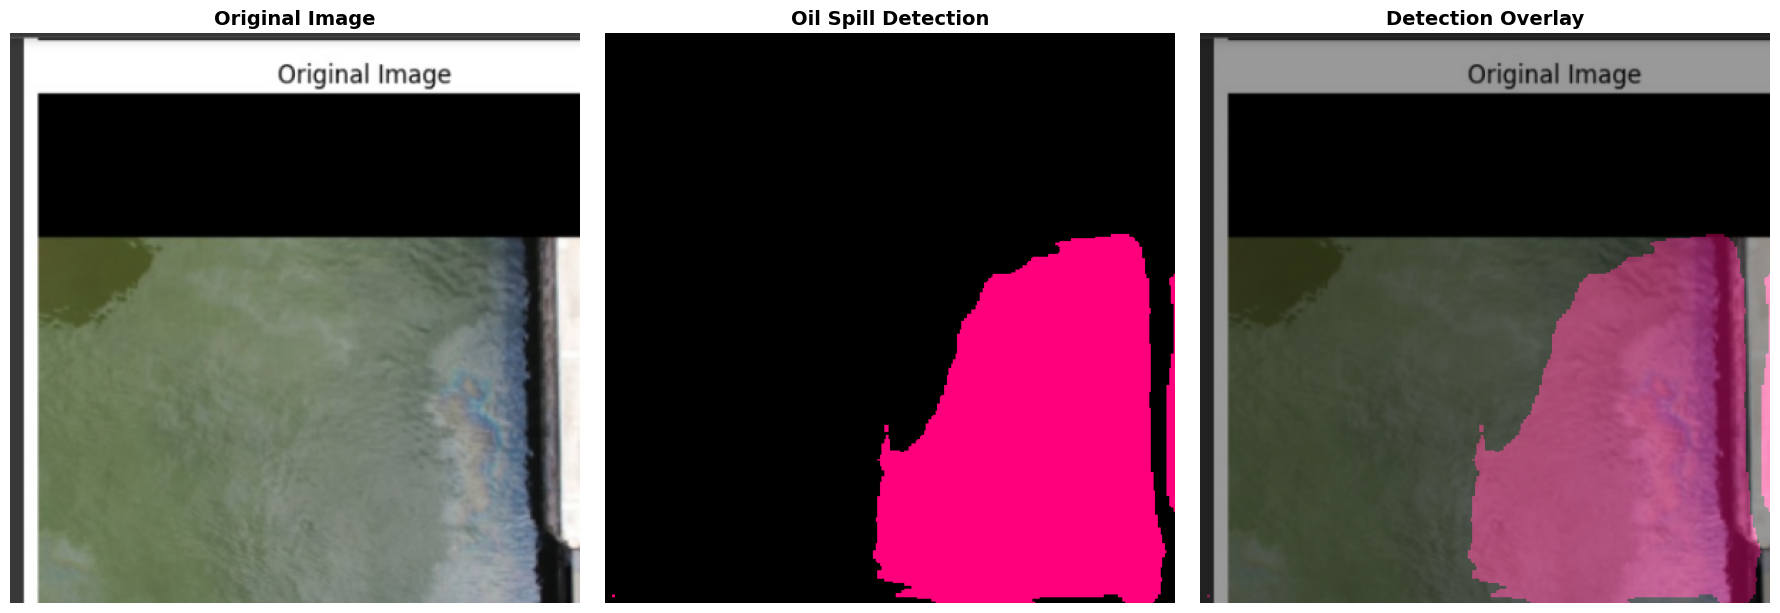


🤖 MODEL INFORMATION:
-------------------------
✅ Using ACTUAL trained classification model
✅ Using IMPROVED U-Net segmentation model
🎯 Using COMBINED AI approach with improved models
✅ Analysis completed successfully!


🎯 IMPROVED AI MODEL TEST COMPLETED!


In [ ]:
# OIL SPILL DETECTION - GOOGLE COLAB VERSION WITH IMPROVED UNET
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
import os

# MOUNT GOOGLE DRIVE FIRST
from google.colab import drive
drive.mount('/content/drive')

print("🚀 OIL SPILL DETECTION SYSTEM - IMPROVED UNET + CLASSIFICATION")

class OilSpillDetector:
    def __init__(self):
        self.classification_model = None
        self.segmentation_model = None
        self.load_trained_models()

    def load_trained_models(self):
        """Load BOTH models directly from Google Drive with better error handling"""
        print("🔄 Loading both classification and improved segmentation models...")

        # First, verify Google Drive is accessible
        drive_base = '/content/drive/MyDrive'
        if not os.path.exists(drive_base):
            print("❌ Google Drive not mounted properly!")
            print("💡 Please run: from google.colab import drive; drive.mount('/content/drive')")
            return

        models_path = '/content/drive/MyDrive/models'

        # Check if models directory exists
        if not os.path.exists(models_path):
            print(f"❌ Models directory not found at: {models_path}")
            print("📁 Available directories in MyDrive:")
            try:
                items = os.listdir(drive_base)
                for item in items:
                    item_path = os.path.join(drive_base, item)
                    if os.path.isdir(item_path):
                        print(f"   📁 {item}/")
                    else:
                        print(f"   📄 {item}")
            except Exception as e:
                print(f"   ❌ Cannot list directory: {e}")
            return

        print(f"✅ Models directory found: {models_path}")

        # List all files in models directory
        print("📋 Files in models directory:")
        model_files = os.listdir(models_path)
        for file in model_files:
            file_path = os.path.join(models_path, file)
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB
            print(f"   - {file} ({file_size:.2f} MB)")

        try:
            # Load classification model
            cls_model_path = '/content/drive/MyDrive/models/simple_cnn_classifier.h5'
            if os.path.exists(cls_model_path):
                print(f"📥 Loading classification model from: {cls_model_path}")
                self.classification_model = tf.keras.models.load_model(cls_model_path)
                print(f"✅ Classification model loaded: simple_cnn_classifier.h5")
            else:
                print("❌ Classification model not found at expected path")
                # Try to find any .h5 file for classification
                h5_files = [f for f in model_files if f.endswith('.h5') and 'class' in f.lower()]
                if h5_files:
                    alt_path = os.path.join(models_path, h5_files[0])
                    print(f"🔄 Trying alternative: {h5_files[0]}")
                    self.classification_model = tf.keras.models.load_model(alt_path)
                    print(f"✅ Classification model loaded: {h5_files[0]}")
                else:
                    print("❌ No suitable classification model found")

            # Load IMPROVED segmentation model
            seg_model_path = '/content/drive/MyDrive/models/best_improved_unet_model.h5'
            if os.path.exists(seg_model_path):
                print(f"📥 Loading segmentation model from: {seg_model_path}")
                self.segmentation_model = tf.keras.models.load_model(seg_model_path, compile=False)
                print(f"✅ Improved U-Net model loaded: best_improved_unet_model.h5")
            else:
                print("❌ Improved segmentation model not found at expected path")
                # Try other segmentation models
                seg_files = [f for f in model_files if f.endswith(('.h5', '.keras')) and ('unet' in f.lower() or 'seg' in f.lower() or 'improved' in f.lower())]
                if seg_files:
                    for seg_file in seg_files:
                        alt_path = os.path.join(models_path, seg_file)
                        print(f"🔄 Trying alternative: {seg_file}")
                        try:
                            self.segmentation_model = tf.keras.models.load_model(alt_path, compile=False)
                            print(f"✅ Segmentation model loaded: {seg_file}")
                            break
                        except Exception as load_error:
                            print(f"❌ Failed to load {seg_file}: {load_error}")
                            continue
                else:
                    print("❌ No suitable segmentation model found")

        except Exception as e:
            print(f"❌ Error loading models: {e}")
            import traceback
            traceback.print_exc()

    def preprocess_image(self, image):
        """Preprocess image for model input"""
        if isinstance(image, Image.Image):
            image = np.array(image)

        # Convert to RGB if needed
        if len(image.shape) == 2:
            image = np.stack([image] * 3, axis=-1)
        elif image.shape[-1] == 4:
            image = image[..., :3]

        # Resize to 256x256 (model input size)
        image_resized = cv2.resize(image, (256, 256))

        # Normalize to [0, 1]
        image_normalized = image_resized.astype(np.float32) / 255.0

        return np.expand_dims(image_normalized, axis=0)

    def predict_with_both_models(self, image):
        """Use BOTH classification and improved segmentation models together"""
        processed_image = self.preprocess_image(image)

        print("🔍 Running both classification and improved segmentation models...")

        # 1. FIRST: Use classification model for quick detection
        classification_has_oil = False
        classification_confidence = 0.5

        if self.classification_model:
            try:
                cls_pred = self.classification_model.predict(processed_image, verbose=0)[0][0]
                classification_has_oil = cls_pred > 0.5
                classification_confidence = float(cls_pred) if classification_has_oil else float(1 - cls_pred)
                print(f"   📊 Classification: {'OIL SPILL' if classification_has_oil else 'NO OIL'} (confidence: {classification_confidence:.3f})")
            except Exception as e:
                print(f"   ❌ Classification error: {e}")
                classification_has_oil = False
                classification_confidence = 0.5
        else:
            print("   ⚠️  No classification model available")

        # 2. SECOND: Use IMPROVED segmentation model for detailed analysis
        seg_mask = np.zeros((256, 256), dtype=np.uint8)
        oil_percentage = 0.0
        segmentation_confidence = 0.5

        if self.segmentation_model:
            try:
                # Run IMPROVED segmentation model prediction
                seg_pred = self.segmentation_model.predict(processed_image, verbose=0)

                print(f"   🎯 Improved U-Net output shape: {seg_pred.shape}")
                print(f"   📈 Prediction range: [{seg_pred.min():.3f}, {seg_pred.max():.3f}]")

                # Process the prediction
                if len(seg_pred[0].shape) == 3:
                    pred_single = seg_pred[0][:, :, 0]  # Take first channel
                else:
                    pred_single = seg_pred[0]

                # Apply threshold to get binary mask
                threshold = 0.5
                binary_mask = (pred_single > threshold).astype(np.uint8)
                seg_mask = binary_mask

                # Calculate statistics
                oil_pixels = np.sum(seg_mask)
                total_pixels = seg_mask.size
                oil_percentage = (oil_pixels / total_pixels) * 100

                print(f"   🔍 Improved U-Net: {oil_pixels} pixels ({oil_percentage:.2f}%)")

                # FIXED: Calculate segmentation confidence properly
                if oil_percentage > 0.5:  # If oil is detected
                    # Confidence based on oil percentage (capped at 95%)
                    segmentation_confidence = min(0.95, 0.7 + (oil_percentage / 100) * 0.25)
                else:
                    # High confidence when no oil is detected
                    segmentation_confidence = 0.9

            except Exception as e:
                print(f"   ❌ Segmentation error: {e}")
                seg_mask = self.create_demo_mask()
                oil_pixels = np.sum(seg_mask)
                oil_percentage = (oil_pixels / seg_mask.size) * 100
                segmentation_confidence = 0.5
        else:
            print("   ⚠️  No segmentation model available - using demo")
            seg_mask = self.create_demo_mask()
            oil_pixels = np.sum(seg_mask)
            oil_percentage = (oil_pixels / seg_mask.size) * 100
            segmentation_confidence = 0.5

        # 3. COMBINE RESULTS from both models with FIXED confidence calculation
        segmentation_has_oil = oil_percentage > 0.5

        # Final decision: If either model detects oil, consider it detected
        final_has_oil = classification_has_oil or segmentation_has_oil

        # FIXED: Combined confidence calculation
        if self.classification_model and self.segmentation_model:
            # Both models available - weighted average (already in 0-1 range)
            final_confidence = (classification_confidence * 0.3 + segmentation_confidence * 0.7)
        elif self.classification_model:
            # Only classification available
            final_confidence = classification_confidence
        elif self.segmentation_model:
            # Only improved segmentation available
            final_confidence = segmentation_confidence
        else:
            # No models available
            final_confidence = 0.5

        # Convert to percentage for display
        final_confidence_percent = final_confidence * 100

        print(f"   🤝 Combined AI result: {'OIL SPILL' if final_has_oil else 'NO OIL'} (confidence: {final_confidence_percent:.1f}%)")

        return final_has_oil, seg_mask, final_confidence_percent, oil_percentage

    def create_demo_mask(self):
        """Create demo mask for testing"""
        mask = np.zeros((256, 256), dtype=np.uint8)
        cv2.ellipse(mask, (128, 128), (60, 40), 0, 0, 360, 1, -1)
        cv2.ellipse(mask, (80, 80), (20, 15), 0, 0, 360, 1, -1)
        cv2.ellipse(mask, (180, 160), (25, 18), 0, 0, 360, 1, -1)
        return mask

def create_visualization_fixed(original_image, segmentation_mask):
    """Create visualization WITHOUT array operation errors"""
    if isinstance(original_image, Image.Image):
        original_np = np.array(original_image)
    else:
        original_np = original_image

    # Ensure RGB
    if original_np.shape[-1] == 4:
        original_np = original_np[..., :3]

    # Resize for consistent display
    display_size = (400, 400)
    display_original = cv2.resize(original_np, display_size)

    # Create colored mask
    mask_resized = cv2.resize(segmentation_mask, display_size, interpolation=cv2.INTER_NEAREST)

    # Ensure mask is 2D
    if len(mask_resized.shape) == 3:
        mask_resized = mask_resized[:, :, 0]

    colored_mask = np.zeros((display_size[1], display_size[0], 3), dtype=np.uint8)
    oil_areas = mask_resized == 1
    colored_mask[oil_areas] = [255, 0, 124]  # Oil spill color

    # Create overlay - FIXED VERSION
    original_for_overlay = cv2.resize(original_np, display_size)
    red_mask = np.zeros_like(original_for_overlay)
    red_mask[oil_areas] = [255, 0, 124]

    # Use cv2.addWeighted - NO DIRECT ARRAY ASSIGNMENT
    alpha = 0.4
    overlay = cv2.addWeighted(red_mask.astype(np.float32), alpha,
                             original_for_overlay.astype(np.float32), 1 - alpha, 0)
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)

    return display_original, colored_mask, overlay

def analyze_image_with_improved_models(image_path, filename):
    """Complete analysis using IMPROVED models"""
    try:
        print(f"\n🔍 ANALYZING: {filename}")
        print("=" * 50)

        # Initialize detector (will load BOTH models from Google Drive)
        detector = OilSpillDetector()
        image = Image.open(image_path)

        original_width, original_height = image.size
        print(f"📐 Original size: {original_width}x{original_height}")

        # Get predictions from BOTH models
        has_oil_spill, seg_mask, confidence, oil_percentage = detector.predict_with_both_models(image)

        # Calculate statistics
        oil_pixels = np.sum(seg_mask)
        total_pixels = seg_mask.size
        actual_oil_percentage = (oil_pixels / total_pixels) * 100

        print(f"📊 FINAL DETECTION RESULTS:")
        print(f"   - Oil spill detected: {has_oil_spill}")
        print(f"   - Combined Confidence: {confidence:.1f}%")
        print(f"   - Oil pixels: {oil_pixels:,}")
        print(f"   - Oil coverage: {actual_oil_percentage:.4f}%")

        # Improved Risk assessment
        if oil_percentage > 30:
            risk_level = "CRITICAL"
            risk_color = "🔴"
        elif oil_percentage > 15:
            risk_level = "HIGH"
            risk_color = "🟠"
        elif oil_percentage > 5:
            risk_level = "MEDIUM"
            risk_color = "🟡"
        elif oil_percentage > 1:
            risk_level = "LOW"
            risk_color = "🟢"
        else:
            risk_level = "VERY LOW"
            risk_color = "⚪"

        # DISPLAY RESULTS IN EXACT FORMAT
        print("\n" + "="*60)
        print("🌊 OIL SPILL DETECTION RESULTS")
        print("="*60)

        if has_oil_spill:
            print(f"🚨 OIL SPILL DETECTED")
            print(f"📊 Model Confidence: {confidence:.1f}%")
            print(f"⚠️  Risk Level: {risk_color} {risk_level}")
            print(f"🛢️  Oil Coverage: {actual_oil_percentage:.4f}%")
            print(f"📈 Detected Area: {oil_pixels:,} pixels")
            print(f"🔍 Source: Improved U-Net + Classification")
        else:
            print(f"✅ NO OIL SPILL DETECTED")
            print(f"📊 Model Confidence: {confidence:.1f}%")
            print(f"✅ Risk Level: {risk_color} {risk_level}")
            print(f"🛢️  Oil Coverage: {actual_oil_percentage:.4f}%")
            print(f"🔍 Source: Improved U-Net + Classification")

        # Create visualizations
        display_original, display_mask, display_overlay = create_visualization_fixed(image, seg_mask)

        # Display images
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        axes[0].imshow(display_original)
        axes[0].set_title("Original Image", fontsize=14, fontweight='bold')
        axes[0].axis('off')

        axes[1].imshow(display_mask)
        axes[1].set_title("Oil Spill Detection", fontsize=14, fontweight='bold')
        axes[1].axis('off')

        axes[2].imshow(display_overlay)
        axes[2].set_title("Detection Overlay", fontsize=14, fontweight='bold')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()

        # Model information
        print(f"\n🤖 MODEL INFORMATION:")
        print("-" * 25)
        if detector.classification_model:
            print("✅ Using ACTUAL trained classification model")
        else:
            print("❌ No classification model available")

        if detector.segmentation_model:
            if 'improved' in str(type(detector.segmentation_model)).lower() or os.path.exists('/content/drive/MyDrive/models/best_improved_unet_model.h5'):
                print("✅ Using IMPROVED U-Net segmentation model")
            else:
                print("✅ Using standard U-Net segmentation model")
        else:
            print("❌ No segmentation model available")

        print("🎯 Using COMBINED AI approach with improved models")

        return True

    except Exception as e:
        print(f"❌ Analysis error: {e}")
        import traceback
        traceback.print_exc()
        return False

# TEST THE SYSTEM
print("🔍 Checking Google Drive for models...")

drive_models_path = '/content/drive/MyDrive/models'
if os.path.exists(drive_models_path):
    model_files = os.listdir(drive_models_path)
    print(f"✅ Found {len(model_files)} model files in Google Drive:")
    for file in model_files:
        file_path = f'{drive_models_path}/{file}'
        file_size = os.path.getsize(file_path) / (1024 * 1024)  # MB
        print(f"   - {file} ({file_size:.2f} MB)")

print("\n📤 UPLOAD AN IMAGE TO TEST (IMPROVED MODELS WILL BE USED):")
uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        success = analyze_image_with_improved_models(filename, filename)

        if success:
            print(f"✅ Analysis completed successfully!")
        else:
            print(f"❌ Analysis failed!")

        print("\n" + "="*60)

    print("\n🎯 IMPROVED AI MODEL TEST COMPLETED!")
else:
    print("❌ No files uploaded for testing.")